# Lab 07 - Data preprocessing II

Name: Andrew Hawk  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2020SP  
Instructor: Brain King  

6 hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) [P] Create a Python function called process_FAA_hourly_data that takes a filename (with path) as a string, and returns a completely processed pandas data frame, ready for analysis. It should do everything that the previous lab did to clean the file, including
###    a. converting all numeric variables to their simplest numeric types
###    b. converting the date/time stamp (first variable) to a pandas         DatetimeIndex, which becomes the actual index for the data frame. (It should drop the date time variable after moving it to become the index.)
###    c. If you did not do this in the last lab, make sure that the DatetimeIndex is localized to a specific timezone! This is very important! What time zone? Did you notice the header? The time stamp is in GMT, so be sure to localize the index accordingly. HOW? After you set up the index, you can do:

###           df.index = df.index.tz_localize(tz='GMT')

In [2]:
def process_FAA_hourly_data(file_name):
    # create dataframe
    df_temps = pd.read_csv(file_name, skiprows=16) 
    
    # Remove redundant header rows
    remove_name = df_temps.columns[0] # 'Date/Time (GMT)'
    df_temps = df_temps[df_temps.iloc[:,0] != remove_name]
    df_temps = df_temps.reset_index(drop=True)
    
    # Drop last column
    df_temps = df_temps.iloc[:,:13]
    
    # Convert numeric variables to simplest numeric types
    df_temps = df_temps.apply(pd.to_numeric, errors="ignore", downcast="float")
    df_temps = df_temps.apply(pd.to_numeric, errors="ignore", downcast="integer")
    
    # Convert first column to datetime
    df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])
    
    # Set date/time column to index
    df_temps = df_temps.set_index("Date/Time (GMT)", drop=True)
    df_temps.index = df_temps.index.tz_localize(tz='GMT')
    
    return df_temps
    
    
    
    

### 2) [P] Use your new function to read in the KIPT data file you downloaded in the last lab. Store your data frame as df_kipt. Output the results of info() and describe() to confirm you read it in correctly.

In [3]:
df_kipt = process_FAA_hourly_data("../data/faa_hourly-KIPT_20000101-20191231_raw.csv")
display(df_kipt.info())
display(df_kipt.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173252 entries, 2000-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 12 columns):
Number of Observations (n/a)     173252 non-null int8
Average Temp (F)                 172253 non-null float32
Max Temp (F)                     172253 non-null float32
Min Temp (F)                     172253 non-null float32
Average Dewpoint Temp (F)        172147 non-null float32
1 Hour Precip (in)               28934 non-null float32
Max Wind Gust (mph)              23544 non-null float32
Average Relative Humidity (%)    168754 non-null float32
Average Wind Speed (mph)         172710 non-null float32
Average Station Pressure (mb)    172974 non-null float32
Average Wind Direction (deg)     140590 non-null float32
Max Wind Speed (mph)             172710 non-null float32
dtypes: float32(11), int8(1)
memory usage: 8.8 MB


None

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,173252.000000,172253.000000,172253.000000,172253.000000,172147.000000,28934.000000,23544.000000,168754.000000,172710.000000,172974.000000,140590.000000,172710.000000
mean,1.339915,51.286217,51.399208,51.179626,40.253628,0.030566,22.295341,68.819511,5.904806,1016.741272,176.806366,6.175715
std,0.854852,18.888988,18.907930,18.881851,19.053423,0.079247,7.581788,19.694031,5.192565,7.640043,118.790619,5.311181
min,0.000000,-11.900000,-11.900000,-11.900000,-20.900000,0.000000,0.000000,0.000000,0.000000,508.600006,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.830000,0.000000,19.600000,54.000000,0.000000,1012.200012,70.000000,0.000000
50%,1.000000,52.000000,52.000000,51.799999,41.000000,0.000000,21.900000,71.000000,5.370000,1016.900024,220.000000,5.800000
75%,1.000000,66.900002,66.900002,66.900002,57.000000,0.030000,26.500000,86.000000,9.200000,1021.700012,280.000000,9.200000
max,10.000000,102.000000,102.000000,102.000000,79.000000,2.350000,88.599998,100.000000,76.000000,1044.400024,360.000000,76.000000


### 3) [P] In the last lab, you assessed the number of missing dates in your data, under the assumption that every hour should have an observation. For now, we'll leave the fact that there are completely missing hourly observations from the weather station. This time, report the number of missing values in each variable of df_kipt. (HINT: One way is to use the isna() method.)

In [4]:
sel = df_kipt.apply(pd.isna, axis=0)
sel = sel.apply(pd.value_counts, axis=0)
sel.iloc[1,:]

Number of Observations (n/a)          NaN
Average Temp (F)                    999.0
Max Temp (F)                        999.0
Min Temp (F)                        999.0
Average Dewpoint Temp (F)          1105.0
1 Hour Precip (in)               144318.0
Max Wind Gust (mph)              149708.0
Average Relative Humidity (%)      4498.0
Average Wind Speed (mph)            542.0
Average Station Pressure (mb)       278.0
Average Wind Direction (deg)      32662.0
Max Wind Speed (mph)                542.0
Name: True, dtype: float64

### 4) [M] Which variables seem to have the most consistent, complete observations? Which are missing the most? Are they really "missing", or are they observations where an event did not occur? Discuss.

Ref: https://www.pprune.org/tech-log/436031-difference-between-gust-maximum-winds.html

Average wind speed, average station pressure, and max wind speed have the most consistent, complete observations. 1 hour precip and max wind gust are missing the most observations. This data is NOT actually missing. These missing obervations are where an event did not occur. Obviously, it is not always raining. Also, there are not always wind gusts. A wind gust occurs "when the highest peak speed is at least 5 knots higher than the current two-minute average and the highest peak is at least 15 knots".

### 5) [P/M] Ignore the date, and report the frequency over hours that have missing "Average Temp (F)" values. Be sure to report the LOCAL times according to the time zone "US/Eastern". Output the hours in order of the most frequent to least. Then, as a comment, just interpret what you see. Do you see a pattern? Do missing temps tend to happen at a certain time of day? (HINT: This might be challenging. First, as always, select the subset of your data matching your criteria. Then, for these data, look at the index. Date / time values have LOTS of attributes themselves... such as hour. What do you get if you count these values?)

There doesn't seem to be any hours that are more likely to have missing values. The difference between the max missing hour and min missing hour amounts is only 46., which is not much given 20 years of data. 


In [5]:
df_kipt.index = df_kipt.index.tz_convert(tz='US/Eastern')

display(df_kipt.iloc[:,1].isna().groupby(df_kipt.index.hour).sum().sort_values(ascending=False))

Date/Time (GMT)
11    78.0
12    68.0
10    63.0
13    56.0
14    46.0
6     41.0
9     40.0
15    40.0
7     40.0
8     39.0
5     38.0
4     37.0
3     37.0
17    36.0
2     36.0
1     36.0
16    35.0
0     34.0
22    34.0
18    34.0
19    34.0
23    33.0
20    32.0
21    32.0
Name: Average Temp (F), dtype: float64

### 6) [P/M] Repeat the previous exercise, but this time, assess the same variable for the day of the week. (NOTE: Be sure to note what a 0 is. In pandas, a 0 for day of the week is a Monday! (See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html )

Saturday has the least amount of missing data points, and Tuesday has the most. Once again, there does not seem to be a pattern relating day of the week to missing values. 

In [6]:
df_kipt.iloc[:,1].isna().groupby(df_kipt.index.day_name()).sum().sort_values(ascending=False)

Date/Time (GMT)
Tuesday      209.0
Wednesday    195.0
Monday       167.0
Thursday     161.0
Sunday       115.0
Friday       114.0
Saturday      38.0
Name: Average Temp (F), dtype: float64

### 7) [P] Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated file, but a tab separated file. Store the data frame as stations. Show stations.info() after you read in the data.

In [7]:
# Ref: https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac
stations = pd.read_csv("../data/FAA_PA_stations.csv", sep="\t")
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
ID                  46 non-null object
Name                46 non-null object
County              45 non-null object
State               46 non-null object
Lat                 46 non-null float64
Lon                 46 non-null float64
Elevation (feet)    46 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


### 8) [P] As usual, you must always assess your missing data, if any. Are there any observations (rows) in stations that have missing data? Output them, and eliminate them from your data. Be sure to reset_index(drop=True) to reset the index in case any observations are dropped. Output stations.info() again.

In [8]:
stations = stations.dropna().reset_index(drop=True)
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
ID                  45 non-null object
Name                45 non-null object
County              45 non-null object
State               45 non-null object
Lat                 45 non-null float64
Lon                 45 non-null float64
Elevation (feet)    45 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


### 9) [P] Examine the data frame of stations by showing the first few observations using stations.head(10) In particular, pay close attention to the variables Lat and Lon. These represent the precise latitude and longitude geolocation for the weather station.

In [9]:
stations.head(10)

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.04,-78.41,1516.0
7,KDYL,DOYLESTOWN,BUCKS,PA,40.33,-75.12,394.0
8,KDUJ,DUBOIS,JEFFERSON,PA,41.18,-78.90,1814.0
9,KERI,ERIE,ERIE,PA,42.08,-80.17,730.0


### 10) Create a new variable in stations called "distKIPT" that stores the distance of every station in PA to Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations.

In [10]:
import math
lat = stations[stations.iloc[:,0] == "KIPT"].iat[0,4]
long = stations[stations.iloc[:,0] == "KIPT"].iat[0,5]

dist = lambda row:math.sqrt(math.pow(lat-row.iat[4],2)+math.pow(long-row.iat[5],2))

stations["distKIPT"] = stations.apply(lambda row: dist(row), axis=1)
stations.head()

,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0,1.593267
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0,1.691892
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0,3.501685
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0,1.808867
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0,3.066235


### 11) [P] Output the top 10 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [11]:
# Ref: https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/
stations.nsmallest(10,"distKIPT")

,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
29,KIPT,WILLIAMSPORT,LYCOMING,PA,41.24,-76.92,520.0,0.000000
26,KSEG,SELINSGROVE,SNYDER,PA,40.82,-76.86,444.0,0.424264
18,KMUI,MUIR ARMY AIR FIELD,LEBANON,PA,40.43,-76.57,489.0,0.882383
27,KUNV,UNIVERSITY PARK,CENTRE,PA,40.85,-77.85,1240.0,1.008464
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,1.022399
16,KMDT,MIDDLETOWN,DAUPHIN,PA,40.19,-76.76,312.0,1.062121
25,KAVP,SCRANTON,LUZERNE,PA,41.33,-75.72,956.0,1.203370
13,KLNS,LANCASTER,LANCASTER,PA,40.12,-76.29,403.0,1.285029
24,KRDG,READING,BERKS,PA,40.37,-75.96,360.0,1.295569
31,KTHV,YORK,YORK,PA,39.92,-76.87,486.0,1.320947


### 12) [P] Using your results, go back to the PSU climate website ( http://climate.met.psu.edu/data/ida/ ), and download the faa_hourly data for the THREE closest stations that have hourly data available in the same date range as the data you downloaded from KIPT (i.e. 2000-01-01 à 2019-12-31). (HINT: You may need to skip a station because it does not have data available in this range.) Copy the data into your data folder. Then, read in each data file into its own data frame using your function. You should have four data frames: df_kipt, and three other data frames representing the three closest stations. Show the result of info() on your three new data frames.

In [12]:
df_kcxy = process_FAA_hourly_data("../data/faa_hourly-KCXY_20000101-20191231_raw.csv")
df_kseg = process_FAA_hourly_data("../data/faa_hourly-KSEG_20000101-20191231_raw.csv")
df_kunv = process_FAA_hourly_data("../data/faa_hourly-KUNV_20000101-20191231_raw.csv")
display(df_kcxy.info())
display(df_kseg.info())
display(df_kunv.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127229 entries, 2000-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 12 columns):
Number of Observations (n/a)     127229 non-null int8
Average Temp (F)                 126767 non-null float32
Max Temp (F)                     126767 non-null float32
Min Temp (F)                     126767 non-null float32
Average Dewpoint Temp (F)        126630 non-null float32
1 Hour Precip (in)               17548 non-null float32
Max Wind Gust (mph)              14922 non-null float32
Average Relative Humidity (%)    123356 non-null float32
Average Wind Speed (mph)         127026 non-null float32
Average Station Pressure (mb)    126624 non-null float32
Average Wind Direction (deg)     115184 non-null float32
Max Wind Speed (mph)             127026 non-null float32
dtypes: float32(11), int8(1)
memory usage: 6.4 MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172179 entries, 2000-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 12 columns):
Number of Observations (n/a)     172179 non-null int8
Average Temp (F)                 171579 non-null float32
Max Temp (F)                     171579 non-null float32
Min Temp (F)                     171579 non-null float32
Average Dewpoint Temp (F)        171386 non-null float32
1 Hour Precip (in)               26631 non-null float32
Max Wind Gust (mph)              18401 non-null float32
Average Relative Humidity (%)    167855 non-null float32
Average Wind Speed (mph)         171396 non-null float32
Average Station Pressure (mb)    171931 non-null float32
Average Wind Direction (deg)     123311 non-null float32
Max Wind Speed (mph)             171396 non-null float32
dtypes: float32(11), int8(1)
memory usage: 8.7 MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168630 entries, 2000-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 12 columns):
Number of Observations (n/a)     168630 non-null int8
Average Temp (F)                 167310 non-null float32
Max Temp (F)                     167310 non-null float32
Min Temp (F)                     167310 non-null float32
Average Dewpoint Temp (F)        167299 non-null float32
1 Hour Precip (in)               7505 non-null float32
Max Wind Gust (mph)              32070 non-null float32
Average Relative Humidity (%)    162847 non-null float32
Average Wind Speed (mph)         168298 non-null float32
Average Station Pressure (mb)    167219 non-null float32
Average Wind Direction (deg)     151713 non-null float32
Max Wind Speed (mph)             168298 non-null float32
dtypes: float32(11), int8(1)
memory usage: 8.5 MB


None

### 13) [P] Create a new data frame called df_ave_temps that contains the average temperature from all four stations. Name the variables with the four-letter station identifier (e.g. "KIPT"). The index should have a COMPLETE hourly date range from the start date "20000101 00:00:00 GMT" to finish date "20191231 23:00:00 GMT". The results should be a complete dataset with an observation for every hour. If hourly observations are missing from the station you are copying from, then a NaN value should be stored for that entry. You will use these data for the remainder of this exercise. Show df_ave_temps.info()

In [13]:
df_ave_temps = pd.DataFrame(index = pd.date_range(start="2000", end="12-31-2019 23:00:00", freq="H", tz="GMT"))
df_kipt.index = df_kipt.index.tz_convert(tz='GMT') #convert back to GMT from US/East
df_ave_temps['KIPT'] = df_kipt.iloc[:,1]
df_ave_temps['KCXY'] = df_kcxy.iloc[:,1]
df_ave_temps['KSEG'] = df_kseg.iloc[:,1]
df_ave_temps['KUNV'] = df_kunv.iloc[:,1]
df_ave_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2000-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Freq: H
Data columns (total 4 columns):
KIPT    172253 non-null float32
KCXY    126767 non-null float32
KSEG    171579 non-null float32
KUNV    167310 non-null float32
dtypes: float32(4)
memory usage: 4.0 MB


### 14) [P] Report the number of observations in df_ave_temps that have missing temps for each location. You should output a DataFrame or Series that shows four values.

In [14]:
df_ave_temps.isna().sum()

KIPT     3067
KCXY    48553
KSEG     3741
KUNV     8010
dtype: int64

### 15) [P] Report the number of missing data in KIPT that have at least one alternative station with an existing value. You should output a statement like, "There are XXXX out of XXXX values in KIPT that can be restored from other locations." Also, show the first 10 observations of these data that meet this criteria using head(10).

In [15]:
rest_count = 0 # Total number of values that can be restored
total_count = 0 # Total number of missing KIPT values
df_ave_temps_alternative = pd.DataFrame() # Define dataframe to hold all rows that can be restored

checkRow = lambda row: row.iloc[1:].isna().sum() != 3 # return true if there is at least one non-na value

def check(row):
    global rest_count, total_count, df_ave_temps_alternative
    if(pd.isna(row.iloc[0])):
        if(checkRow(row)):
            rest_count += 1
            df_ave_temps_alternative = df_ave_temps_alternative.append(row)
        total_count += 1



df_ave_temps.apply(lambda row: check(row), axis=1)
print("There are {} out of {} values in KIPT that can be restored from other locations.".format(rest_count, total_count))
df_ave_temps_alternative.head(10)



There are 1847 out of 3067 values in KIPT that can be restored from other locations.


,KCXY,KIPT,KSEG,KUNV
2000-01-03 18:00:00,NaN,NaN,53.099998,57.200001
2000-01-05 17:00:00,NaN,NaN,35.099998,32.000000
2000-01-06 20:00:00,NaN,NaN,41.000000,39.200001
2000-01-07 14:00:00,35.599998,NaN,36.000000,35.599998
2000-01-10 02:00:00,NaN,NaN,39.000000,37.400002
2000-01-10 03:00:00,NaN,NaN,39.000000,35.599998
2000-01-10 04:00:00,NaN,NaN,36.000000,NaN
2000-01-10 05:00:00,NaN,NaN,32.000000,NaN
2000-01-10 06:00:00,NaN,NaN,34.000000,NaN
2000-01-10 07:00:00,NaN,NaN,35.349998,NaN


### 16) [P] Remember that exercise in the previous lab that gathered the number of missing data by year? Report the number of missing data in KIPT by year that CANNOT be restored from any of the other stations. What year is standing out as the least likely to be successfully restored?

In [16]:
rest_count = 0 # Total number of values that can be restored
total_count = 0 # Total number of missing KIPT values
df_ave_temps_alternative2 = pd.DataFrame() # Define dataframe to hold all rows that cannot be restored

checkRow = lambda row: row.iloc[1:].isna().sum() == 3 # return true if there is at no non-na value

def check(row):
    global rest_count, total_count, df_ave_temps_alternative2
    if(pd.isna(row.iloc[0])):
        if(checkRow(row)):
            rest_count += 1
            df_ave_temps_alternative2 = df_ave_temps_alternative2.append(row)
        total_count += 1



df_ave_temps.apply(lambda row: check(row), axis=1)
print("There are {} out of {} values in KIPT that cannot be restored from other locations.".format(rest_count, total_count))
print("The year 2000 is standing out as the least likely to be successfully restored.")
#df_ave_temps_alternative2.head(10)
df_ave_temps_alternative2.resample('Y').size()

There are 1220 out of 3067 values in KIPT that cannot be restored from other locations.
The year 2000 is standing out as the least likely to be successfully restored.


2000-12-31    739
2001-12-31     13
2002-12-31      4
2003-12-31     15
2004-12-31      7
2005-12-31      7
2006-12-31      6
2007-12-31     34
2008-12-31    109
2009-12-31     24
2010-12-31     10
2011-12-31     13
2012-12-31     41
2013-12-31     28
2014-12-31     11
2015-12-31     27
2016-12-31      8
2017-12-31     61
2018-12-31     44
2019-12-31     19
Freq: A-DEC, dtype: int64

### 17) [P] It still looks like one year in particular is pretty bad. Confirm this visually by creating a line plot that plots all four stations for that one year, with each station a different color. Make sure KIPT stands out in some way. Only show the data for that one year you answered in the previous exercise. Interpret your results. In particular, do you see any other problems from any stations? (This might be a good time to use an interactive data visualization tool such as Plotly!) Label your plot (e.g. title, axis, legend)

C:\Users\ahawk\Anaconda3\envs\csci349\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


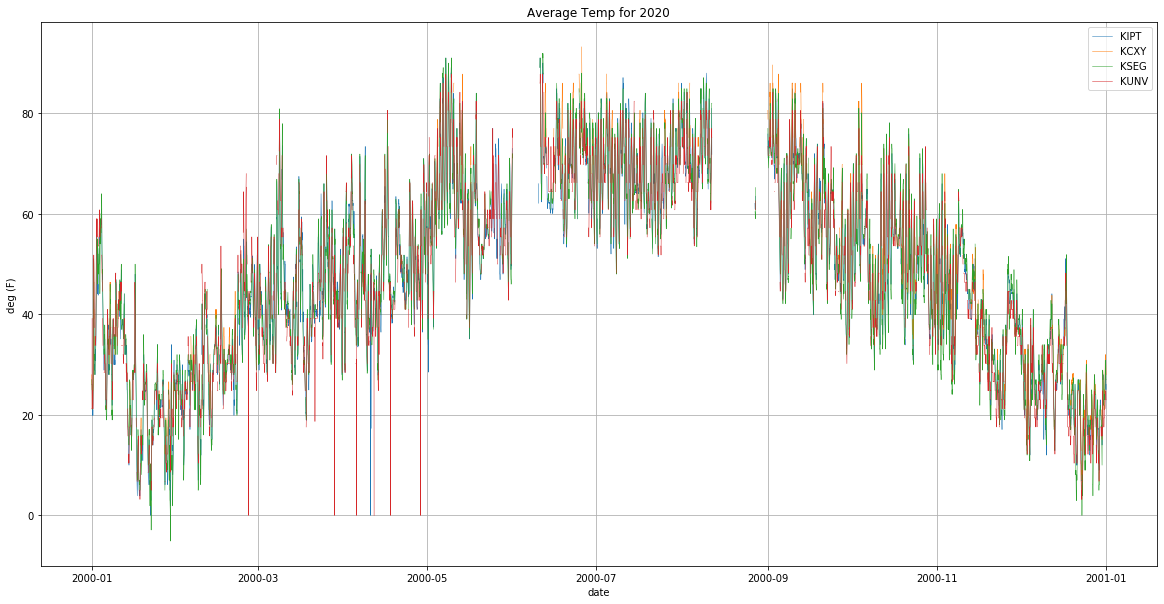

In [17]:
plt.rcParams['figure.figsize'] = [20, 10] # width, height

df_plot = df_ave_temps[df_ave_temps.index.year == 2000] # Extract data only from 2000
df_plot
plt.plot(df_plot.index, df_plot.iloc[:,0], df_plot.iloc[:,1], linewidth=0.5)
plt.plot(df_plot.index, df_plot.iloc[:,2], df_plot.iloc[:,3], linewidth=0.5)
plt.xlabel("date")
plt.ylabel("deg (F)")
plt.grid(True)
plt.title("Average Temp for 2020")
plt.legend(["KIPT","KCXY","KSEG","KUNV"])
plt.show()
# KCXY IS VERY VERY SPARSE

In [18]:
# Ref: https://plot.ly/python/line-charts/
""""
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,0],
                    line=dict(color = "blue", width=1),
                    name='KIPT'))
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,1],
                    line=dict(color = "green", width=1),
                    name='KCXY'))
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,2],
                    line=dict(color = "red", width=1),
                    name='KSEG'))
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,3],
                    line=dict(color = "orange", width=1),
                    name='KUNV'))
fig.show()"""

'"\nimport plotly.graph_objects as go\nimport plotly.express as px\nfig = go.Figure()\nfig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,0],\n                    line=dict(color = "blue", width=1),\n                    name=\'KIPT\'))\nfig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,1],\n                    line=dict(color = "green", width=1),\n                    name=\'KCXY\'))\nfig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,2],\n                    line=dict(color = "red", width=1),\n                    name=\'KSEG\'))\nfig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.iloc[:,3],\n                    line=dict(color = "orange", width=1),\n                    name=\'KUNV\'))\nfig.show()'

### 18) [P] Looking at your plot of 2000 over all stations should reveal that KUNV is problematic at 6 different times. Report these observations, but report them from your full KUNV dataframe. Show only those observations.

In [19]:
display("Time 1:", df_plot.loc[pd.to_datetime("2000-2-26 13:00")])
display("Time 2:", df_plot.loc[pd.to_datetime("2000-3-28 14:00")])
display("Time 3:",df_plot.loc[pd.to_datetime("2000-4-05 14:00")])
display("Time 4:",df_plot.loc[pd.to_datetime("2000-4-11 22:00")])
display("Time 5:",df_plot.loc[pd.to_datetime("2000-4-17 21:00")])
display("Time 6:",df_plot.loc[pd.to_datetime("2000-4-28 15:00")])

'Time 1:'

KIPT    38.900002
KCXY          NaN
KSEG    39.900002
KUNV     0.000000
Name: 2000-02-26 13:00:00+00:00, dtype: float32

'Time 2:'

KIPT    48.0
KCXY     NaN
KSEG    50.0
KUNV     0.0
Name: 2000-03-28 14:00:00+00:00, dtype: float32

'Time 3:'

KIPT    39.450001
KCXY          NaN
KSEG    37.900002
KUNV     0.000000
Name: 2000-04-05 14:00:00+00:00, dtype: float32

'Time 4:'

KIPT    44.0
KCXY     NaN
KSEG    48.0
KUNV     0.0
Name: 2000-04-11 22:00:00+00:00, dtype: float32

'Time 5:'

KIPT    44.0
KCXY     NaN
KSEG    46.0
KUNV     0.0
Name: 2000-04-17 21:00:00+00:00, dtype: float32

'Time 6:'

KIPT    54.450001
KCXY          NaN
KSEG    57.000000
KUNV     0.000000
Name: 2000-04-28 15:00:00+00:00, dtype: float32

### 19) [M] How could you algorithmically detect those problems? Keep in mind that simply saying to turn 0.0 into NaN is not an acceptable solution. 0.0 may very well be a real value!

A simple way to detect these problems is the following. Calculate the mean of the other valid (i.e. non-NaN) temperature readings, and see if the temperature reading of KUNV is some constant number of degrees (lets say 15) above or below the mean.

### 20) [P] Now, write the code to generate line plot(s) for all of KIPT visually, and only KIPT. Look for peculiarities, usually indicated by a sudden change that is outside of what would be considered normal, or an extreme temperature reading that would be impossible to observe in reality. Then, document your findings of areas that you think may be problematic, if any.

1) April 10th 12:00 to 18:00: Average temperature jumps from 0 to 47.9 in one hour.  
2) May 1st 13:00 to 15:00: Average temperature 50.3 --> 28.5 --> 58.63  
Besides these, everything else seems to be relatively accurate. There are some quick accelerations in temperature, but they are not instantaneous.

In [20]:
"""fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ave_temps.index, y=df_ave_temps.iloc[:,0],
                    line=dict(color = "blue", width=1),
                    name='KIPT'))
fig.show()"""

'fig = go.Figure()\nfig.add_trace(go.Scatter(x=df_ave_temps.index, y=df_ave_temps.iloc[:,0],\n                    line=dict(color = "blue", width=1),\n                    name=\'KIPT\'))\nfig.show()'

### 21) [P] Compute a new Series that represents a running delta temperature between adjacent average temperature readings for KIPT. Then, plot the distribution of these data using whatever visualization you think characterizes this distribution best. (HINT: It's a series of observations over a single numeric variable. What type of plot can reveal the distribution of these data?)

In [21]:
"""delta = df_ave_temps.iloc[:,0].diff().dropna()
fig = go.Figure()
fig.add_trace(go.Scatter(x=delta.index, y=delta,
                    line=dict(color = "blue", width=0.5),
                    name='KIPT'))
fig.show()"""

'delta = df_ave_temps.iloc[:,0].diff().dropna()\nfig = go.Figure()\nfig.add_trace(go.Scatter(x=delta.index, y=delta,\n                    line=dict(color = "blue", width=0.5),\n                    name=\'KIPT\'))\nfig.show()'

### 22) [P] Perhaps it's more important to select the station that has the most similar values. Write a function called compare_station that takes two Series objects of numeric data, and computes the sum of the absolute value of the difference between each pair of numbers in both Series. You should only sum the values that have valid values for both entries. Return the average of these absolute differences. Then, call compare_station on KIPT and each of the new station, but pass only the average temp vector from each station using your df_ave_temps

In [22]:
def compare_station(series_1, series_2):
    abs_sum = 0;
    count = 0
    for i in range(len(series_1)):
        if(np.isnan(series_1.iloc[i]) or np.isnan(series_2.iloc[i])):
            continue
        else:
            abs_sum += abs(series_1.iloc[i]-series_2.iloc[i])
            count += 1
    return abs_sum/count;
    
display("KIPT, KXCY: {:.3f}".format(compare_station(df_ave_temps.iloc[:,0], df_ave_temps.iloc[:,1])))
display("KIPT, KSEG: {:.3f}".format(compare_station(df_ave_temps.iloc[:,0], df_ave_temps.iloc[:,2])))
display("KIPT, KUNV: {:.3f}".format(compare_station(df_ave_temps.iloc[:,0], df_ave_temps.iloc[:,3])))

'KIPT, KXCY: 3.712'

'KIPT, KSEG: 2.064'

'KIPT, KUNV: 3.001'

### 23) [P] As we learned in class, you could compute a correlation coefficient between columns of data to determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other stations you downloaded. They should all be very close to 1, but not quite. What does this technique suggest which station is most similar?

In [23]:
df_ave_temps.corr()
# This suggests that KIPT is most similar to KSEG.

,KIPT,KCXY,KSEG,KUNV
KIPT,1.000000,0.981163,0.988329,0.979906
KCXY,0.981163,1.000000,0.982902,0.977124
KSEG,0.988329,0.982902,1.000000,0.973051
KUNV,0.979906,0.977124,0.973051,1.000000


### 24) [M] Interpret what you have observed so far. Which station is most similar? How would this affect your approach to cleaning your data? Are there other things you might do to clean your data?

From my answers in both 22) and 23), it seems that KSEG is most similar to KIPT. When cleaning my data, I can predict missing data and identify peculiar data from KIPT by using data from KSEG. When cleaning my data, I may also look to employ other stats comparator methods with KIPT and KSEG.

### 25) [P] Create a new attribute called KIPT_GOOD in your df_ave_temps data frame that keeps all of the original average temp data, but takes the readings from the closest station with available data to replace in the NA values. Be sure to replace the data from the best representative first, then the second best. Ignore the third. When you perform data cleaning, NEVER DELETE YOUR ORIGINAL DATA! Either store it, or just create a separate attribute of cleaned data, or create a separate data frame. AND, be sure to print out what you are doing. Be sure to include a before and after view to indicate how many values you fixed.

In [24]:
def replace(row):
    global df_ave_temps, row_count
    # value_1 is best representative and value_2 is second best representative
    value_1 = 2 # KSEG
    value_2 = 3 # KUNV
    if(np.isnan(row.iloc[4])): # check if KIPT_GOOD is NaN
        if(~np.isnan(row.iloc[value_1])): # if KSEG is not empty
            df_ave_temps.iloc[row_count,4] = row.iloc[value_1]
        elif(~np.isnan(row.iloc[value_2])): # if KUNV is not empty
            df_ave_temps.iloc[row_count,4] = row.iloc[value_2]
    row_count += 1

row_count = 0
df_ave_temps['KIPT_GOOD'] = df_ave_temps.iloc[:,0]
print("Amount of NaN values in KIPT before: {}".format(df_ave_temps.iloc[:,4].isna().sum()))
df_ave_temps.apply(lambda row: replace(row), axis=1)
print("Amount of NaN values in KIPT after: {}".format(df_ave_temps.iloc[:,4].isna().sum()))
#~np.isnan(df_ave_temps.iloc[2])

Amount of NaN values in KIPT before: 3067
Amount of NaN values in KIPT after: 1233


### 26) [P] How many missing values left in KIPT_GOOD are "singletons", i.e. a missing value surrounded by two good observations?

In [25]:
count = 0
for i in range(1,len(df_ave_temps.iloc[:,4])-1): # do not include first or last element to avoid errors
    if(np.isnan(df_ave_temps.iloc[i,4])): # True is KIPT_GOOD value is NaN for this row
        if(~np.isnan(df_ave_temps.iloc[i-1,4]) and ~np.isnan(df_ave_temps.iloc[i+1,4])): # True if values above and below are not missing
            count += 1
print("Total number of singletons: {}".format(count))

Total number of singletons: 147


### 27) [P] Go through the variable KIPT_GOOD, and convert all singletons to an average of the surrounding observations. For example [..., 2, Nan, 5, ...] would be filled in with (2+5)/2 = 3.5. Then, report the number of values that are still missing in KIPT_GOOD.

In [26]:
for i in range(1,len(df_ave_temps.iloc[:,4])-1): # do not include first or last element to avoid errors
    if(np.isnan(df_ave_temps.iloc[i,4])): # True is KIPT_GOOD value is NaN for this row
        if(~np.isnan(df_ave_temps.iloc[i-1,4]) and ~np.isnan(df_ave_temps.iloc[i+1,4])): # True if values above and below are not missing
            df_ave_temps.iloc[i,4] = (df_ave_temps.iloc[i-1,4] + df_ave_temps.iloc[i+1,4])/2
print("Amount of NaN values in KIPT after: {}".format(df_ave_temps.iloc[:,4].isna().sum()))         

Amount of NaN values in KIPT after: 1086


### 28) [P] Eliminate that first year of data from df_ave_temps. There are too many missing values in these data to make it worthwhile.

In [27]:
df_ave_temps = df_ave_temps[df_ave_temps.index.year != 2000]
df_ave_temps.head()

,KIPT,KCXY,KSEG,KUNV,KIPT_GOOD
2001-01-01 00:00:00+00:00,21.0,23.0,19.0,15.8,21.0
2001-01-01 01:00:00+00:00,19.9,21.9,19.0,14.0,19.9
2001-01-01 02:00:00+00:00,19.0,21.0,17.1,15.8,19.0
2001-01-01 03:00:00+00:00,19.0,19.0,14.0,15.8,19.0
2001-01-01 04:00:00+00:00,19.0,18.0,14.0,15.8,19.0


### 29) [P] Generate a final report of the total number of missing values in df_ave_temps.KIPT_GOOD by year.

In [28]:
print("Amount of NaN values in KIPT: {}".format(df_ave_temps.iloc[:,4].isna().sum()))     
sel = df_ave_temps.iloc[:,4].isna()
df_ave_temps_missing = df_ave_temps[sel]
df_ave_temps_missing.fillna(1).resample('Y').count().iloc[:,4]

Amount of NaN values in KIPT: 355


2001-12-31 00:00:00+00:00    11
2002-12-31 00:00:00+00:00     0
2003-12-31 00:00:00+00:00    11
2004-12-31 00:00:00+00:00     2
2005-12-31 00:00:00+00:00     5
2006-12-31 00:00:00+00:00     3
2007-12-31 00:00:00+00:00    30
2008-12-31 00:00:00+00:00    90
2009-12-31 00:00:00+00:00    15
2010-12-31 00:00:00+00:00     6
2011-12-31 00:00:00+00:00    10
2012-12-31 00:00:00+00:00    18
2013-12-31 00:00:00+00:00    21
2014-12-31 00:00:00+00:00     5
2015-12-31 00:00:00+00:00    20
2016-12-31 00:00:00+00:00     6
2017-12-31 00:00:00+00:00    52
2018-12-31 00:00:00+00:00    35
2019-12-31 00:00:00+00:00    15
Freq: A-DEC, Name: KIPT_GOOD, dtype: int64

### 30) [P] Finally, create some good, clean line plots of KIPT_GOOD. Create at least three plots using different averaging times. One should be the raw data. Create one by month. Then, create one by year. Be sure they are labeled.

C:\Users\ahawk\Anaconda3\envs\csci349\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


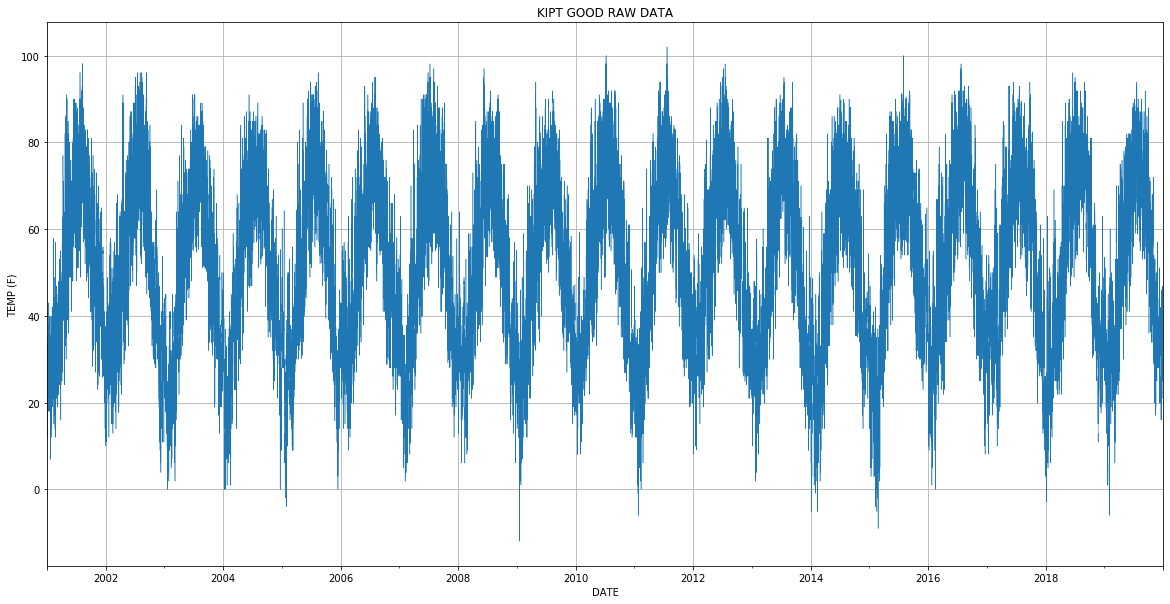

In [30]:
df_ave_temps["KIPT_GOOD"].plot(linewidth=0.5)
plt.title("KIPT GOOD RAW DATA")
plt.xlabel("DATE")
plt.ylabel("TEMP (F)")
plt.grid(True)

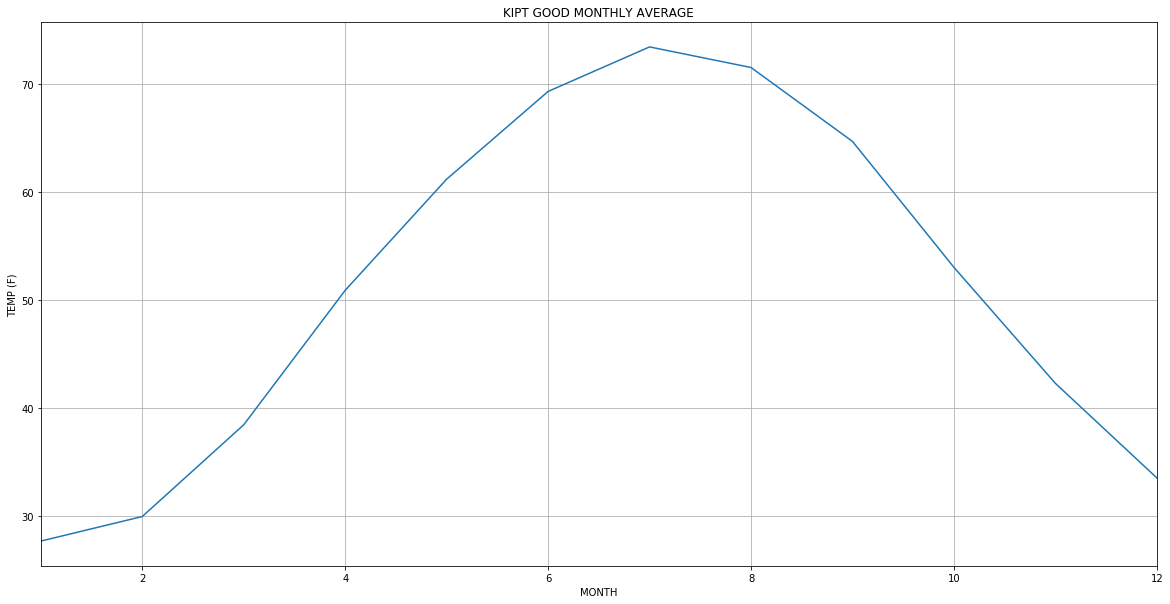

In [36]:
df_ave_temps["KIPT_GOOD"].groupby(df_ave_temps.index.month).mean().plot()
plt.title("KIPT GOOD MONTHLY AVERAGE")
plt.xlabel("MONTH")
plt.ylabel("TEMP (F)")
plt.grid(True)

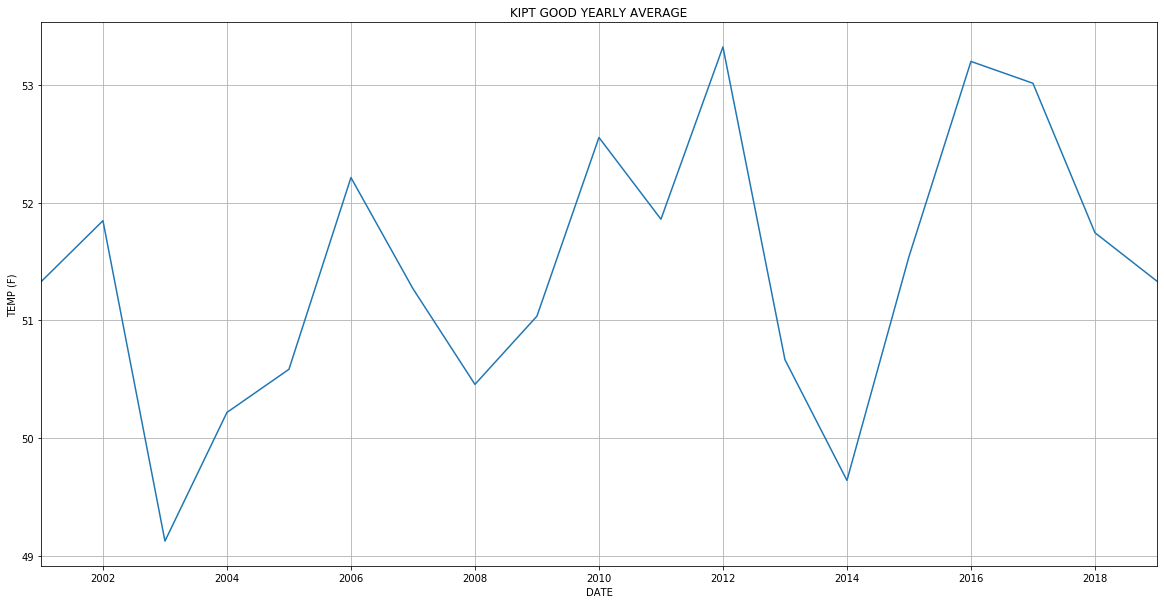

In [37]:
df_ave_temps["KIPT_GOOD"].groupby(df_ave_temps.index.year).mean().plot()
plt.title("KIPT GOOD YEARLY AVERAGE")
plt.xlabel("DATE")
plt.ylabel("TEMP (F)")
plt.grid(True)